<a href="https://colab.research.google.com/github/VasanthPrakasam/Case-Study-3_-Finance-Fraud-Detection-/blob/main/Finance_(Fraud_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Online Payment Fraud Detection.csv', encoding='unicode-escape')


In [ ]:
print(data.info())
print(data.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124969 entries, 0 to 124968
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            124969 non-null  int64  
 1   type            124969 non-null  object 
 2   amount          124969 non-null  float64
 3   nameOrig        124968 non-null  object 
 4   oldbalanceOrg   124968 non-null  float64
 5   newbalanceOrig  124968 non-null  float64
 6   nameDest        124968 non-null  object 
 7   oldbalanceDest  124968 non-null  float64
 8   newbalanceDest  124968 non-null  float64
 9   isFraud         124968 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.5+ MB
None
step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64


In [ ]:
print(data.describe())
print("Unique Destinations:", data.nameDest.unique())
print("Unique Customers:", data.nameOrig.unique())


                step        amount  oldbalanceOrg  newbalanceOrig  \
count  124969.000000  1.249690e+05   1.249680e+05    1.249680e+05   
mean        8.929463  1.774371e+05   9.064400e+05    9.228023e+05   
std         1.857972  3.438788e+05   2.850433e+06    2.887545e+06   
min         1.000000  3.200000e-01   0.000000e+00    0.000000e+00   
25%         8.000000  1.062086e+04   0.000000e+00    0.000000e+00   
50%         9.000000  5.804260e+04   2.009850e+04    0.000000e+00   
75%        10.000000  2.181951e+05   1.957658e+05    2.231230e+05   
max        11.000000  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest        isFraud  
count    1.249680e+05    1.249680e+05  124968.000000  
mean     9.014215e+05    1.185434e+06       0.000960  
std      2.392143e+06    2.749865e+06       0.030973  
min      0.000000e+00    0.000000e+00       0.000000  
25%      0.000000e+00    0.000000e+00       0.000000  
50%      2.895438e+04    7.620559e+04       0.00

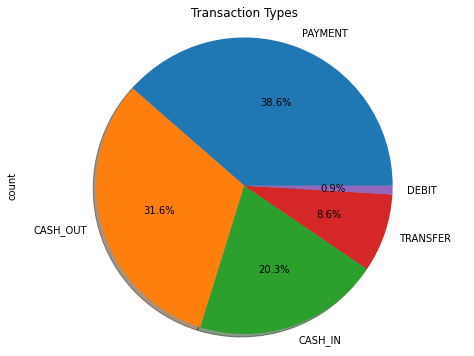

In [ ]:
plt.figure(figsize=(8, 6))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, title='Transaction Types')
plt.axis('equal')
plt.show()


In [ ]:
print("Fraudulent Transactions:", len(data[data.isFraud == 1]))
print("Not Fraudulent Transactions:", len(data[data.isFraud == 0]))

Fraudulent Transactions: 120
Not Fraudulent Transactions: 124848


In [ ]:
fraud = data[data.isFraud == 1]
non_fraud_sample = data[data.isFraud == 0].sample(n=len(fraud))
balanced_data = pd.concat([non_fraud_sample, fraud], axis=0)

In [ ]:
encoder_df = pd.get_dummies(balanced_data, columns=['type', 'nameOrig', 'nameDest'])


In [ ]:
X = encoder_df.drop('isFraud', axis=1)
Y = encoder_df['isFraud']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
def train_and_evaluate(model):
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)

    print('\nClassification Report:\n', metrics.classification_report(Y_test, preds))
    cm = metrics.confusion_matrix(Y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.show()
    print('Accuracy:', metrics.accuracy_score(Y_test, preds))
    return metrics.roc_auc_score(Y_test, probs[:, 1])



Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        24
         1.0       0.83      0.79      0.81        24

    accuracy                           0.81        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.81      0.81      0.81        48



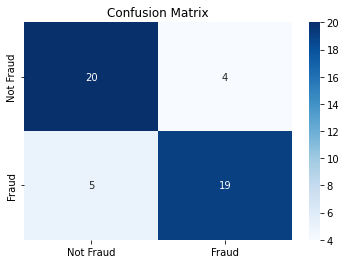

Accuracy: 0.8125
Random Forest AUC: 0.9505208333333334


In [ ]:
rf_model = RandomForestClassifier(random_state=5, n_estimators=20)
print("Random Forest AUC:", train_and_evaluate(rf_model))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        24
         1.0       1.00      0.83      0.91        24

    accuracy                           0.92        48
   macro avg       0.93      0.92      0.92        48
weighted avg       0.93      0.92      0.92        48



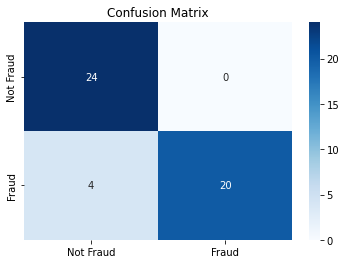

Accuracy: 0.9166666666666666
Logistic Regression AUC: 0.984375


In [ ]:
log_reg_model = LogisticRegression(max_iter=1000)
print("Logistic Regression AUC:", train_and_evaluate(log_reg_model))


In [ ]:
def detect_fraud(transaction):
    return rf_model.predict([transaction])[0]

In [ ]:
for i in range(15):
    test_transaction = X_test.iloc[i]
    result = "Fraudulent" if detect_fraud(test_transaction) else "Not Fraudulent"
    print(f"Transaction {i+1}: {result}")

Transaction 1: Fraudulent
Transaction 2: Not Fraudulent
Transaction 3: Not Fraudulent
Transaction 4: Not Fraudulent
Transaction 5: Not Fraudulent
Transaction 6: Fraudulent
Transaction 7: Fraudulent
Transaction 8: Fraudulent
Transaction 9: Not Fraudulent
Transaction 10: Not Fraudulent
Transaction 11: Fraudulent
Transaction 12: Not Fraudulent
Transaction 13: Fraudulent
Transaction 14: Fraudulent
Transaction 15: Fraudulent
